<a href="https://colab.research.google.com/github/salanne/dynamol/blob/main/gpaw_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Running DFT with ASE and GPAW ##

Installing Atomic Simulation Environment (ASE) and GPAW

In [1]:
%%capture
!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw

Calculating energy of H$_2$

In [32]:
from ase import Atoms
from ase.io import read, write
from gpaw import GPAW, PW
import time

d = 2.0
h2 = Atoms('H2', [(5.0, 5.0, 5.0-d/2.0), (5.0, 5.0, 5.0+d/2.0)])
h2.cell = [10.0, 10.0, 10.0]
write('h2.cif', h2)
print(h2.cell)
print(h2.positions)

Cell([10.0, 10.0, 10.0])
[[5. 5. 4.]
 [5. 5. 6.]]


Testing for energy cutoff convergence

In [33]:
cutoffs = [200,300,400,500,1000]
times = []
energies = []

for cutoff in cutoffs:
  start_time = time.time()
  calc = GPAW(xc='LDA',
              kpts=(1,1,1),
              mode=PW(cutoff),
              txt='h2.txt')
  h2.set_calculator(calc)
  energies.append(h2.get_potential_energy())
  times.append(time.time() - start_time)
print(times)  # seconds
print(energies)  # eV

[2.398611545562744, 3.9296653270721436, 4.682137727737427, 7.573368310928345, 18.254449367523193]
[-2.131795434987745, -2.227466259848393, -2.286735213053772, -2.3091130858339146, -2.3190196956705837]


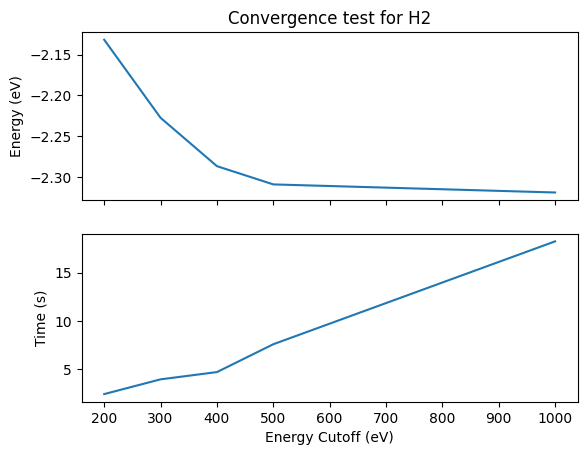

In [34]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, sharex=True)
ax[0].plot(cutoffs, energies)
ax[0].set_ylabel('Energy (eV)')
ax[0].set_title('Convergence test for H2')

ax[1].plot(cutoffs, times)
ax[1].set_ylabel('Time (s)')
ax[1].set_xlabel('Energy Cutoff (eV)')

plt.show()

Calculating the electron density and plotting a contour plot

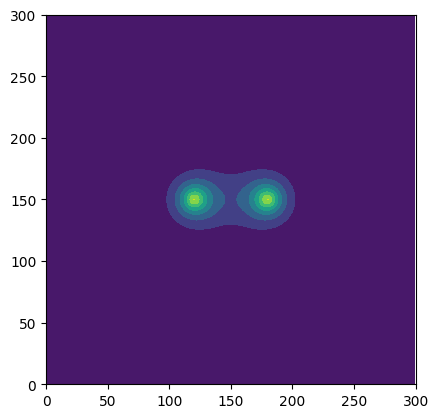

In [35]:
import numpy as np

n = calc.get_all_electron_density(gridrefinement=4)

nred = np.sum(n, axis=0) #sum over density in x-direction
#print(np.shape(nred))

fig, ax = plt.subplots()
ax.contourf(nred)
ax.set_xlim([0, 300])
ax.set_ylim([0, 300])
ax.set_aspect(1)
plt.show()